# Approximated k-hops Jaccard with GRAPE & HyperLogLog
The Approximated k-hops Jaccard algorithm implemented in [🍇🍇 GRAPE 🍇🍇](https://github.com/AnacletoLAB/grape) is a powerful technique for estimating the the shared neighbours of two nodes considering $k$ transitive closures. By running graph convolutions of [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs), the algorithm provides an efficient and scalable approach to approximate the similarity measure while massively minimizing computational complexity.

This Jupyter notebook aims to explore the implementation and application of the approximated k-hops Jaccard algorithm using GRAPE and [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs). We will delve into the details of the algorithm, discuss its advantages and use cases, and provide practical examples of its application in graph processing and machine learning tasks.

**This updated version of the algorithm introduces much better numerical stability, and achieves both much faster and more accurate estimations of the k-hops Jaccard index. Previously, in extremely sparse graphs such as HPO, we were observing a very high error rate, and now that is no longer the case as the update algorithm is able to provide accurate estimates even at small resolutions.**

Furthermore, we explore larger possible precision and bits values, from 4 to 16 and from 4 to 6 respectively, and we provide a more detailed analysis of the error rate of the algorithm. We also illustrate how to compute the k-hops node degree using the same technique.


## What is GRAPE
[🍇🍇 GRAPE 🍇🍇](https://github.com/AnacletoLAB/grape) is a graph processing and embedding library that enables users to easily manipulate and analyze graphs. With [GRAPE](https://github.com/AnacletoLAB/grape), users can efficiently load and preprocess graphs, generate random walks, and apply various node and edge embedding models. Additionally, [GRAPE](https://github.com/AnacletoLAB/grape) provides a fair and reproducible evaluation pipeline for comparing different graph embedding and graph-based prediction methods.

![features in GRAPE](https://github.com/AnacletoLAB/grape/raw/main/images/sequence_diagram.png?raw=true)

## What is a Jaccard similarity coefficient?
The Jaccard similarity coefficient, also known as the Jaccard index, is a measure of similarity between two sets. It quantifies the degree of overlap or similarity between the elements of the sets. The Jaccard similarity coefficient is defined as the size of the intersection of the sets divided by the size of the union of the sets.

Mathematically, the Jaccard similarity coefficient is computed as follows:
$$J(A, B) = \frac{\lvert A \cap B\rvert}{\lvert A \cup B\rvert}$$

where:

* $A$ and $B$ are sets
* $\cap$ denotes the intersection of the sets
* $\cup$ denotes the union of the sets
* $\lvert A \cap B\rvert$ represents the cardinality (number of elements) of the intersection of sets A and B

The resulting coefficient ranges from $0$ to $1$, where $0$ indicates no similarity or no common elements between the sets, and $1$ indicates complete similarity or perfect overlap between the sets.

The Jaccard similarity coefficient is widely used in various fields, including data mining, information retrieval, machine learning, and recommendation systems. It is particularly useful when dealing with binary or categorical data, where the presence or absence of elements is of interest.

### How is it used in graphs?
In graph analysis, the Jaccard similarity coefficient can be applied to measure the similarity between sets of neighbors of nodes in a graph. It provides a way to compare the local neighborhood structures of different nodes and can be used to identify similar nodes or clusters within a graph.

It is important to note that the Jaccard similarity coefficient is a simple and intuitive measure of similarity but has limitations. It does not consider the relative importance or frequency of elements within the sets and treats all elements equally. Additionally, it does not capture the magnitude of differences between sets, only their overlap. Therefore, it is not suitable for measuring the similarity between sets of numerical values.

### What is $k$-hops Jaccard?
The $k$-hops Jaccard similarity, also referred to as the $k$-hops Jaccard index, is a measure of similarity that quantifies the overlap between the neighboring nodes within a graph up to a specified distance, $k$. It provides insights into the similarity of node neighborhoods and captures the shared elements among nodes within a certain proximity.

To understand the concept of the $k$-hops Jaccard index, let's consider a graph where each node represents an entity, such as a user, item, or document, and the edges represent relationships or connections between these entities. The $k$-hops Jaccard index measures the similarity between the sets of neighboring nodes at distances up to $k$, which can be interpreted as the neighbors reachable within $k$ steps in the graph.

Formally, for two given nodes $v, u \in V$ in a graph, the $k$-hops Jaccard index is calculated as the ratio of the number of common neighboring nodes between $v$ and another node $u$, up to distance $k$, to the total number of distinct neighboring nodes of both nodes:

$$J_k(v, u) = \frac{\lvert \mathcal{N}_k(v) \cap \mathcal{N}_k(u)\rvert}{\lvert \mathcal{N}_k(v) \cup \mathcal{N}_k(u)\rvert}$$

where:

* $J_k(v, u)$ represents the k-hops Jaccard index between nodes $v$ and $u$
* $\mathcal{N}_k(v)$ denotes the set of neighboring nodes of node $v$ up to distance $k$
* $\mathcal{N}_k(u)$ denotes the set of neighboring nodes of node $u$ up to distance $k$

In other words, the numerator of the formula calculates the number of common neighbors between nodes $v$ and $u$ within the specified distance $k$, while the denominator represents the total number of distinct neighbors of both nodes.

The $k$-hops Jaccard index provides a measure of similarity that considers not only direct connections between nodes but also the connectivity patterns within a certain range. It captures the similarity of nodes based on their shared neighborhood structures, which can be valuable in various graph analysis tasks, such as community detection, recommendation systems, and link prediction.

By computing the $k$-hops Jaccard index for pairs of nodes within a graph, it is possible to identify nodes with similar local neighborhood structures, uncover cohesive communities, discover related entities, and perform other graph analysis tasks that leverage the notion of proximity and similarity among nodes.

#### Is exact $k$-hops Jaccard computational expensive?
Computing the exact $k$-hops Jaccard similarity between pairs of nodes in a graph can be computationally expensive, especially when dealing with large graphs and nodes with high degrees. The process involves exploring the neighborhoods of each pair of nodes up to a distance of $k$, which can become prohibitive for scalability in terms of time and computational resources.

The main challenge arises from the exponential growth in the number of nodes to consider as the distance $k$ increases. For a node $v$, the number of nodes in its neighborhood at distance $k$ grows exponentially with $k$. This exponential growth leads to an explosion in the number of pairwise comparisons required to compute the exact $k$-hops Jaccard index for all pairs of nodes.

When dealing with large-scale graphs with millions or billions of nodes and varying degrees of connectivity, the computational cost of computing the exact $k$-hops Jaccard index becomes impractical. Exploring all neighborhoods up to distance $k$ for each pair of nodes would involve traversing an enormous number of edges and nodes, resulting in a significant computational burden.

Additionally, nodes with very high degrees pose a specific challenge. These nodes, often referred to as "hubs," have a large number of neighbors, making the neighborhood exploration even more time-consuming. The high degree of hubs leads to an increase in the size of the neighborhood sets, resulting in a higher number of intersections and unions to compute when calculating the Jaccard index.

As a result, exact computation of the k-hops Jaccard index becomes infeasible for large graphs or scenarios where real-time or near-real-time analysis is required. Therefore, alternative approaches are needed to approximate the k-hops Jaccard index efficiently and effectively.

## What is HyperLogLog?
[HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) is a probabilistic data structure designed for estimating the cardinality, or the number of distinct elements, in a set. It provides an efficient and scalable approach to estimate cardinalities, especially in scenarios where the cardinality of the set is extremely large. The implementation of HyperLogLog [available here](https://github.com/LucaCappelletti94/hyperloglog-rs) supports key operations such as adding elements to the set, merging sets, estimating the set cardinalities and, very relevantly to our case, estimating the Jaccard index between two sets.

### Background and Motivation
Traditional methods for exact cardinality estimation, such as maintaining a set or using a bitmap, can consume a significant amount of memory, especially when dealing with large datasets. Storing individual elements or using a bit to represent each element quickly becomes impractical in terms of memory requirements.

[HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) addresses this challenge by offering a compact representation of the set's cardinality with a controlled amount of memory. It achieves this by exploiting the properties of hash functions and probabilistic counting.

### Basic Idea and Working Principle
The basic idea behind [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) is to estimate the cardinality of a set by observing the distribution of hashed values. It leverages the fact that the leading zeros in the binary representation of a hash result follow a specific pattern when uniformly distributed.

[HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) achieves its estimation by dividing the input set into multiple subsets, each processed independently. It applies a hash function to each element in the set, and based on the resulting hash values, determines the maximum number of leading zeros seen in any hash. The maximum leading zeros are used to estimate the cardinality.

### [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) Structure
The [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) data structure consists of an array of registers, where each register stores a value representing the maximum number of leading zeros observed in the hash results. The number of registers is determined by the chosen precision parameter, which controls the accuracy of the estimation. Common values for the precision parameter $p$ range from $4$ to $16$, with derived number of registers $m=2^p$ ranging from $16$ to $65536$. Commonly, each register is represented by either $5$ or $6$ bits.

In the experiments portion of this tutorial, we will be using values of precision $p$ ranging from $4$ to $16$ and values of bits $b$ ranging from $4$ to $6$. This will allow us to explore the trade-off between accuracy and memory consumption.

### Estimation Accuracy and Error
The accuracy of the [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) estimation depends on the chosen precision parameter. Increasing the precision results in a more accurate estimation but requires additional memory. The error rate, or the difference between the estimated and actual cardinality, is typically within a few percentage points.

[HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) provides a reliable estimation technique for large cardinalities while maintaining a fixed memory footprint, making it well-suited for big data and distributed computing environments.

### Applications of HyperLogLog
[HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) has found numerous applications in various domains. Some notable applications include:

* Web analytics: Estimating the number of unique visitors to a website or counting distinct IP addresses.
* Database systems: Approximating the number of distinct values in large datasets without explicitly storing all values.
* Network monitoring: Tracking the number of unique network flows or estimating the size of IP address pools.
* Machine learning: Handling large feature spaces and estimating the number of distinct features.

[HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) provides a powerful and efficient approach to cardinality estimation, enabling scalable analysis and processing of large datasets while effectively managing memory consumption.

## How to implement an efficient $k$-hops Jaccard estimator
In the context of the GRAPE algorithm and the use of [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) counters, the $k$-hops Jaccard index is approximated efficiently by employing [HyperLogLog](https://github.com/LucaCappelletti94/hyperloglog-rs) counters to estimate the cardinality of neighboring nodes' sets. This approximation allows for scalable computation of the $k$-hops Jaccard index in large-scale graphs, enabling efficient graph analytics and machine learning tasks.

The key idea behind the efficient $k$-hops Jaccard estimator is to leverage the properties of HyperLogLog counters and graph convolutions to estimate the Jaccard similarity between neighboring nodes up to $k$ hops. The approach involves the following steps:

* Initialize HyperLogLog counters: Create a HyperLogLog counter for each node in the graph. The counters will be used to approximate the neighborhood sets of the nodes.
* Perform $k$ iterations of graph convolutions: Iterate $k$ times, performing graph convolutions to update the HyperLogLog counters. During each iteration, the counters are updated based on the neighboring nodes' counters, incorporating the information from the previous iteration.
* Estimate Jaccard similarity: Once the $k$ iterations are completed, the estimated Jaccard similarity between any two nodes can be calculated by comparing their corresponding HyperLogLog counters.

```python
# Initialize HyperLogLog counters
counters = [HyperLogLog(PRECISION, BITS) for _ in range(graph.number_of_nodes())]

# We insert all the neighbors of each node in the corresponding counter
for node_id in range(graph.number_of_nodes()):
    for neighbor in graph.get_neighbors(node_id):
        counters[node_id].insert(neighbor)

# At this point, all nodes counters contain the cardinality of their neighborhood
# up to 1 step. We can now perform k iterations of graph convolutions to
# estimate the cardinality of the neighborhood up to k steps.

# We initialize a new set of counters
previous_counters = counters.copy()

# Perform k iterations of graph convolutions
for _ in range(1, k):
    # Iterate over nodes
    for node_id, counter in enumerate(counters):
        # We initialize a new counter
        new_counter = HyperLogLog(PRECISION, BITS)
        
        # And we iterate over this nodes neighbours counters 
        for neighbor in graph.get_neighbors(node_id):
            # We update the new counter with the previous counter of the neighbor
            new_counter |= previous_counters[neighbor]
        
        # We update the counter of the current node
        counter = new_counter | previous_counters[node_id]
    
    # We swap the counters
    counters, previous_counters = previous_counters, counters

# Now, the previous_counters in the last iteration contain the
# estimated cardinality of the neighborhood of each node
# up to k steps and we can use them for k-hops Jaccard estimation
```



## Some pratical experiments
In this section, we will conduct practical experiments using the approximated $k$-hops Jaccard algorithm on three different graphs: Human Phenotype Ontology, Homo Sapiens STRING PPI, and KGCOVID19. The goal is to evaluate how well the algorithm approximates the exact Jaccard similarity for $k=1$ and analyze the histograms for $k=2$ and $k=3$. We will emphasize that as $k$ increases, the exact Jaccard calculation becomes rapidly impractical, highlighting the importance of the approximated approach.

### Graph Selection
* [Human Phenotype Ontology](https://hpo.jax.org/app/): The Human Phenotype Ontology (HPO) is a widely used ontology that represents human phenotypic abnormalities and their relationships. It captures information about various diseases and their associated phenotypes. The graph represents connections between phenotypic abnormalities based on shared features.
* [Homo Sapiens STRING PPI](https://string-db.org/): The Homo Sapiens STRING Protein-Protein Interaction (PPI) graph contains information about protein-protein interactions in humans. It represents connections between proteins based on experimental and computational evidence.
* [KGCOVID19](https://pubmed.ncbi.nlm.nih.gov/32839776/): KGCOVID19 is a knowledge graph that integrates diverse data related to the COVID-19 pandemic. It contains information about various entities, including diseases, drugs, genes, and clinical trials, along with their relationships.

### Evaluating Approximated Jaccard for $k=1$
For each of the selected graphs, we will evaluate how well the approximated $k$-hops Jaccard algorithm estimates the exact Jaccard similarity for $k=1$. We will calculate the exact Jaccard similarity between neighboring nodes and compare it with the estimated Jaccard similarity obtained from the algorithm.

By analyzing the similarity scores and comparing them with the exact values, we can assess the accuracy and reliability of the approximated approach for $k=1$. We will present statistical measures, such as mean absolute error or root mean square error, to quantitatively evaluate the estimation quality.

### Histograms for $k=2$ and $k=3$
Next, we will focus on exploring the histograms of Jaccard similarities for $k=2$ and $k=3$. Since calculating the exact Jaccard similarity for higher values of k becomes impractical due to computational complexity, the approximated approach provides a viable alternative to gain insights into the similarity patterns.

By plotting histograms of the Jaccard similarities for $k=2$ and $k=3$, we can observe the distribution of similarity scores between neighboring nodes. This analysis helps us understand the degree of similarity between nodes at different hop distances and identify clusters or patterns within the graphs.

We will visually compare the histograms obtained from the approximated approach with the theoretical expectations for the exact Jaccard similarity distribution. This comparison will allow us to assess the effectiveness of the approximated algorithm in capturing the underlying similarity patterns in the graphs.

We start by retrieving the graphs from GRAPE graph retrieval system:

In [1]:
%%time
from grape.datasets.kgobo import HP
from grape.datasets.string import HomoSapiens
from grape.datasets.kghub import KGCOVID19

2023-05-24 15:31:35.627253: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-24 15:31:35.627271: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


CPU times: user 4.05 s, sys: 2.75 s, total: 6.8 s
Wall time: 5.42 s


We retrieve from GRAPE the HyperBall-based k-hops Jaccard model.

In [2]:
from grape import models

HyperJaccard = models.HyperJaccard

To clean up the code, we define a function that will be used to display the results of the experiments.

In [3]:
from IPython.display import display, Markdown
from grape import Graph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from tqdm.auto import trange

def experiment(graph: Graph):
    """Display the experiment results for a given graph."""

    display(Markdown(f"## Experiments on {graph.get_name()}"))
    display(Markdown(f"We use the {graph.get_name()} graph with {graph.get_number_of_nodes()} nodes and {graph.get_number_of_directed_edges()} edges."))
    # First portion, experiments for k=1
    display(Markdown(f"### Approximated Jaccard for k=1"))
    display(Markdown(f"We estimate the error between the exact Jaccard and the approximated Jaccard for k=1 for different values of precision and bits."))

    results = []
    # We compute the exact Jaccard for all edges in the graph.
    start = time()
    exact_jaccard = graph.get_jaccard_coefficient_scores()
    time_required_for_exact_jaccard = time() - start

    display(Markdown(f"Time required for computing the exact Jaccard: {time_required_for_exact_jaccard:.6f} seconds."))

    for precision in trange(4, 14, leave=False):
        for bits in range(4, 6+1):
            model = HyperJaccard(number_of_hops=1, precision=precision, bits=bits)
            start = time()
            model.fit(graph)
            end_fitting_time = time() - start
            start = time()
            approximated_jaccard = model.get_jaccard_for_all_edges(graph)
            time_required_for_approximated_jaccard = time() - start
            error_mse = ((exact_jaccard - approximated_jaccard) ** 2).mean()
            error_mae = np.abs(exact_jaccard - approximated_jaccard).mean()
            results.append({
                "precision": precision,
                "bits": bits,
                "k": 1,
                "error_mse": error_mse,
                "error_mae": error_mae,
                "training_time": end_fitting_time,
                "time": time_required_for_approximated_jaccard
            })
    
    dataframe = pd.DataFrame(results)

    # We display the dataframe, splitting and commenting each bits sizes.

    display(Markdown(r"The following table shows the mean absolute error (MAE) and the mean squared error (MSE) for the different memory requirement defined by $\text{bits}^{\text{precision}}$."))
    
    display(dataframe[(dataframe["bits"] == 4)])
    display(dataframe[(dataframe["bits"] == 5)])
    display(dataframe[(dataframe["bits"] == 6)])

    # We define the markers to use to distinguish the values of bits.
    markers = ["o", "v", "s", "P", "X", "D", "p", "h", "d", "H", "*", "X", "o", "v", "s", "P", "X", "D", "p", "h", "d", "H", "*"]

    # We create plots to illustrate the mean errors for the different values of precision and bits.
    # On two different plots side by side, we show the mean absolute error (MAE) and the mean squared error (MSE) on the y-axis,
    # while we show different values of precision on the x-axis. To illustrate the different values of bits,
    # we create different lines using different markers.
    display(Markdown(r"The following figure shows the mean absolute error (MAE) (left) and the mean squared error (MSE) (right) for the different memory requirement defined by $\text{bits}^{\text{precision}}$."))

    # First we plot them in linear scale, and after in log scale.
    for scale in ["linear", "log"]:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
        for bits in range(4, 6+1):
            points = ax1.plot(dataframe[(dataframe["bits"] == bits)]["precision"], dataframe[(dataframe["bits"] == bits)]["error_mae"], markers[bits], label=f"bits={bits}")
            ax1.plot(dataframe[(dataframe["bits"] == bits)]["precision"], dataframe[(dataframe["bits"] == bits)]["error_mae"], color=points[0].get_color(), alpha=0.5)
            points = ax2.plot(dataframe[(dataframe["bits"] == bits)]["precision"], dataframe[(dataframe["bits"] == bits)]["error_mse"], markers[bits], label=f"bits={bits}")
            ax2.plot(dataframe[(dataframe["bits"] == bits)]["precision"], dataframe[(dataframe["bits"] == bits)]["error_mse"], color=points[0].get_color(), alpha=0.5)
        ax1.set_xlabel("Precision")
        ax1.set_ylabel(f"Mean absolute error (MAE) ({scale} scale)")
        ax1.set_yscale(scale)
        ax1.legend()
        ax1.set_title("Mean absolute error (MAE) for the different precision, graph: " + graph.get_name())
        ax2.set_xlabel("Precision")
        ax2.set_ylabel(f"Mean squared error (MSE) ({scale} scale)")
        ax2.set_yscale(scale)
        ax2.legend()
        ax2.set_title("Mean squared error (MSE) for the different precision, graph: " + graph.get_name())
        plt.show()

    # We proceed similarly to illustrate the time required for the different values of precision and bits.
    # We also plot on both plots the time required for the exact Jaccard.

    display(Markdown(r"The following figure shows the time required for the different memory requirement defined by $\text{bits}^{\text{precision}}$."))
    
    # First we plot them in linear scale, and after in log scale.
    for scale in ["linear", "log"]:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
        for bits in range(4, 6+1):
            points = ax1.plot(
                dataframe[(dataframe["bits"] == bits)]["precision"],
                dataframe[(dataframe["bits"] == bits)]["time"],
                markers[bits], label=f"bits={bits}"
            )
            ax1.plot(
                dataframe[(dataframe["bits"] == bits)]["precision"],
                dataframe[(dataframe["bits"] == bits)]["time"],
                color=points[0].get_color(), alpha=0.5
            )

            points = ax2.plot(
                dataframe[(dataframe["bits"] == bits)]["precision"],
                dataframe[(dataframe["bits"] == bits)]["training_time"],
                markers[bits], label=f"bits={bits}"
            )

            ax2.plot(
                dataframe[(dataframe["bits"] == bits)]["precision"],
                dataframe[(dataframe["bits"] == bits)]["training_time"],
                color=points[0].get_color(), alpha=0.5
            )

        ax1.axhline(y=time_required_for_exact_jaccard, color='r', linestyle='-', label="Exact Jaccard")
        ax1.set_xlabel("Precision")
        ax1.set_ylabel(f"Time (seconds) ({scale} scale)")
        ax1.set_yscale(scale)
        ax1.legend()
        ax1.set_title("Time required for the different precision, graph: " + graph.get_name())
        ax2.set_xlabel("Precision")
        ax2.set_ylabel(f"Time (seconds) ({scale} scale)")
        ax2.set_yscale(scale)
        ax2.legend()
        ax2.set_title("Training time required for the different precision, graph: " + graph.get_name())
        plt.show()
    
    display(Markdown(f"### Approximated Jaccard for k=2 and k=3"))
    # Second portion, experiments for k=2 and k=3
    for k in [2, 3]:
        for precision in trange(4, 14, leave=False):
            for bits in range(4, 6+1):
                model = HyperJaccard(number_of_hops=k, precision=precision, bits=bits)
                start = time()
                model.fit(graph)
                end_fitting_time = time() - start
                start = time()
                approximated_jaccard = model.get_jaccard_for_all_edges(graph)
                time_required_for_approximated_jaccard = time() - start
                results.append({
                    "precision": precision,
                    "bits": bits,
                    "k": k,
                    "training_time": end_fitting_time,
                    "time": time_required_for_approximated_jaccard
                })
    
    dataframe = pd.DataFrame(results)

    # We create two plots showing the different time requirements for the different values of k
    # in the training and the approximation phase, for different values of precision and bits.
    # On the same plot, we show the time required for the
    # different k-hops, and the different precisions on the x-axis, while time on the y-axis.

    display(Markdown(r"The following figure shows the time required for the different memory requirement defined by $\text{bits}^{\text{precision}}$."))

    for scale in ["linear", "log"]:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
        for k in [1, 2, 3]:
            for bits in range(4, 6+1):
                points = ax1.plot(
                    dataframe[(dataframe["bits"] == bits) & (dataframe["k"] == k)]["precision"],
                    dataframe[(dataframe["bits"] == bits) & (dataframe["k"] == k)]["time"], 
                    markers[bits], label=f"k={k}, bits={bits}"
                )
                # We also plot the same points, but instead than using a marker we use a line
                # with light transparency and the same color as the marker.
                ax1.plot(
                    dataframe[(dataframe["bits"] == bits) & (dataframe["k"] == k)]["precision"],
                    dataframe[(dataframe["bits"] == bits) & (dataframe["k"] == k)]["time"],
                    color=points[0].get_color(), alpha=0.5
                )

                points = ax2.plot(
                    dataframe[(dataframe["bits"] == bits) & (dataframe["k"] == k)]["precision"],
                    dataframe[(dataframe["bits"] == bits) & (dataframe["k"] == k)]["training_time"],
                    markers[bits], label=f"k={k}, bits={bits}"
                )

                ax2.plot(
                    dataframe[(dataframe["bits"] == bits) & (dataframe["k"] == k)]["precision"],
                    dataframe[(dataframe["bits"] == bits) & (dataframe["k"] == k)]["training_time"],
                    color=points[0].get_color(), alpha=0.5
                )

        ax1.axhline(y=time_required_for_exact_jaccard, color='r', linestyle='-', label="Exact Jaccard")
        ax1.set_xlabel("Precision")
        ax1.set_ylabel(f"Time (seconds) ({scale} scale)")
        ax1.set_yscale(scale)
        ax1.legend()
        ax1.set_title("Time required for the different precision, graph: " + graph.get_name())
        ax2.set_xlabel("Precision")
        ax2.set_ylabel(f"Time (seconds) ({scale} scale)")
        ax2.set_yscale(scale)
        ax2.legend()
        ax2.set_title("Training time required for the different precision, graph: " + graph.get_name())
        plt.show()

    # We show side by side an histogram with the approximated Jaccard for k=1 and the exact one.
    display(Markdown(f"The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1."))
    plt.figure(figsize=(10, 5))
    plt.hist(exact_jaccard, bins=100, label="Exact Jaccard", alpha=0.5)
    model = HyperJaccard(number_of_hops=1, precision=12, bits=6)
    model.fit(graph)
    approximated_jaccard = model.get_jaccard_for_all_edges(graph)
    plt.hist(approximated_jaccard, bins=100, label="k=1", alpha=0.5)
    plt.xlabel("k-hops Jaccard")
    plt.ylabel("Number of edges")
    plt.legend()
    plt.title("Distribution of the exact & approximated Jaccard, graph: " + graph.get_name())
    plt.show()
    
    # Finally, we show an histogram showing the values of the approximated Jaccard for k=1, k=2 and k=3.
    display(Markdown(f"The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1, k=2 and k=3, k=4, and k=5."))

    for scale in ["linear", "log"]:
        plt.figure(figsize=(10, 5))
        plt.hist(exact_jaccard, bins=100, label="Exact Jaccard", alpha=0.5)
        for k in [1, 2, 3, 4, 5]:
            model = HyperJaccard(number_of_hops=k, precision=10, bits=6)
            model.fit(graph)
            approximated_jaccard = model.get_jaccard_for_all_edges(graph)
            plt.hist(approximated_jaccard, bins=100, label=f"k={k}", alpha=0.5)
        plt.xlabel("k-hops Jaccard")
        plt.ylabel(f"Number of edges ({scale} scale)")
        plt.yscale(scale)
        plt.legend()
        plt.title("Distribution of the exact & approximated Jaccard, graph: " + graph.get_name())
        plt.show()

    # Similarly, by using the 'model.get_degree_for_all_nodes' method, we can compute the k-hops degree for all nodes.
    # We can then plot the distribution of the k-hops degree for all nodes.
    # Due to the wide range of values, we use a logarithmic scale for both the x-axis and the y-axis.

    display(Markdown(f"The following figure shows the distribution of the degree for k=1, k=2, k=3, k=4 and k=5."))
    for scale in ["linear", "log"]:
        plt.figure(figsize=(10, 5))
        for k in [1, 2, 3, 4, 5]:
            model = HyperJaccard(number_of_hops=k, precision=10, bits=6)
            model.fit(graph)
            degree = model.get_degree_for_all_nodes(graph)
            plt.hist(degree, bins=100, label=f"k={k}", alpha=0.3)

        plt.xlabel("k-hops degree")
        plt.ylabel(f"Number of nodes ({scale} scale)")
        plt.yscale(scale)
        plt.legend()
        plt.title("Distribution of the k-hops degree, graph: " + graph.get_name())
        plt.show()




## Experiments on HP

We use the HP graph with 31854 nodes and 134167 edges.

### Approximated Jaccard for k=1

We estimate the error between the exact Jaccard and the approximated Jaccard for k=1 for different values of precision and bits.

Time required for computing the exact Jaccard: 0.001894 seconds.

  0%|          | 0/10 [00:00<?, ?it/s]

The following table shows the mean absolute error (MAE) and the mean squared error (MSE) for the different memory requirement defined by $\text{bits}^{\text{precision}}$.

,precision,bits,k,error_mse,error_mae,training_time,time
0,4,4,1,0.014954,0.073372,0.000367,0.000823
3,5,4,1,0.006591,0.046917,0.000286,0.000931
6,6,4,1,0.002979,0.029521,0.000284,0.001388
9,7,4,1,0.001484,0.018804,0.000506,0.002493
12,8,4,1,0.000758,0.011612,0.000336,0.004140
15,9,4,1,0.000388,0.006848,0.000889,0.008338
18,10,4,1,0.000206,0.004029,0.000944,0.015831
21,11,4,1,0.000116,0.002329,0.001693,0.030356
24,12,4,1,0.000063,0.001301,0.003365,0.061402
27,13,4,1,0.000032,0.000780,0.007791,0.116441


,precision,bits,k,error_mse,error_mae,training_time,time
1,4,5,1,0.025767,0.096465,0.000316,0.000878
4,5,5,1,0.008304,0.051936,0.000332,0.001044
7,6,5,1,0.003037,0.030004,0.000318,0.001657
10,7,5,1,0.001488,0.018912,0.000421,0.003015
13,8,5,1,0.000758,0.011623,0.000591,0.005149
16,9,5,1,0.000388,0.006850,0.000938,0.009790
19,10,5,1,0.000206,0.004029,0.001686,0.018803
22,11,5,1,0.000116,0.002329,0.002074,0.035736
25,12,5,1,0.000063,0.001301,0.004643,0.069839
28,13,5,1,0.000031,0.000747,0.010802,0.139354


,precision,bits,k,error_mse,error_mae,training_time,time
2,4,6,1,0.041230,0.115861,0.000306,0.000774
5,5,6,1,0.007746,0.050808,0.000302,0.001059
8,6,6,1,0.003081,0.030068,0.000280,0.001879
11,7,6,1,0.001486,0.018867,0.000409,0.002898
14,8,6,1,0.000759,0.011632,0.000545,0.005822
17,9,6,1,0.000388,0.006849,0.000976,0.009916
20,10,6,1,0.000206,0.004029,0.001742,0.018733
23,11,6,1,0.000116,0.002329,0.002680,0.036497
26,12,6,1,0.000063,0.001301,0.005848,0.074181
29,13,6,1,0.000031,0.000747,0.012887,0.142878


The following figure shows the mean absolute error (MAE) (left) and the mean squared error (MSE) (right) for the different memory requirement defined by $\text{bits}^{\text{precision}}$.

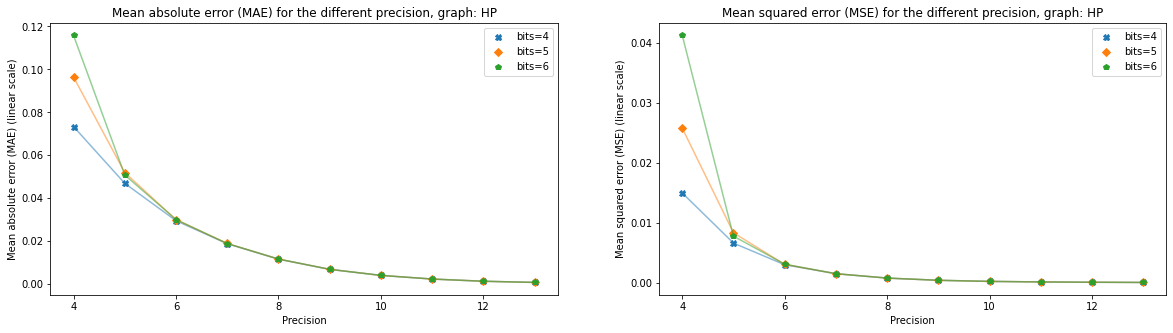

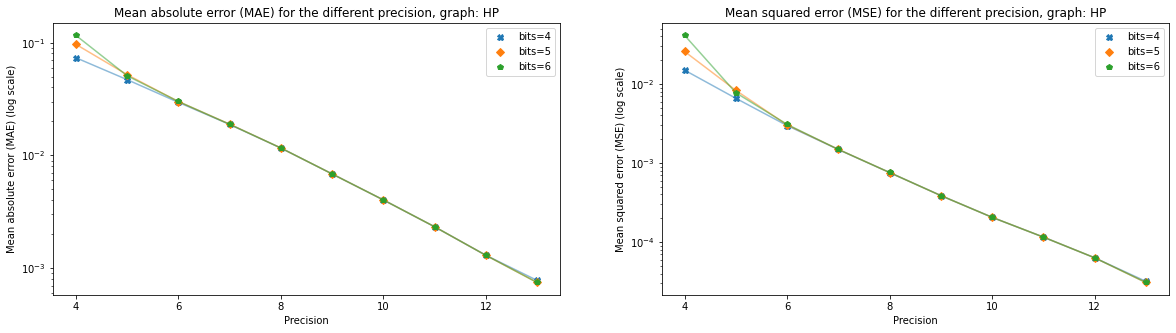

The following figure shows the time required for the different memory requirement defined by $\text{bits}^{\text{precision}}$.

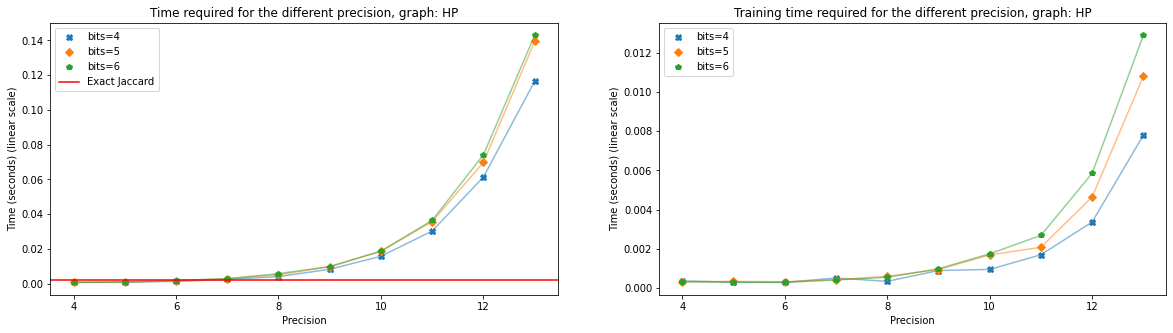

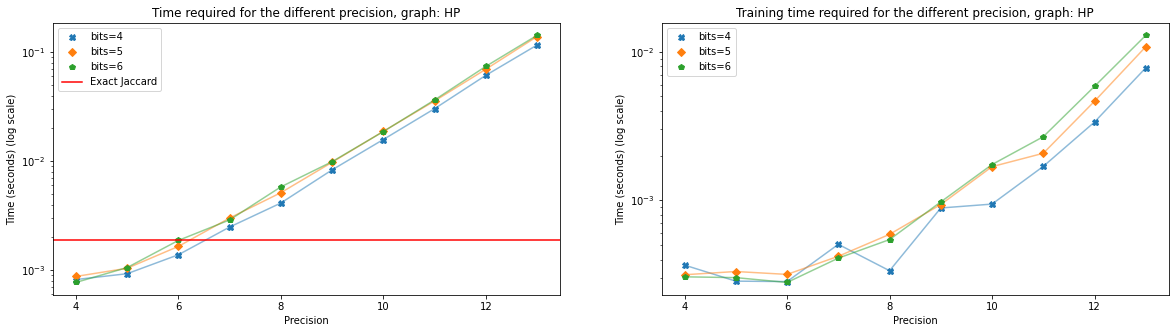

### Approximated Jaccard for k=2 and k=3

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

The following figure shows the time required for the different memory requirement defined by $\text{bits}^{\text{precision}}$.

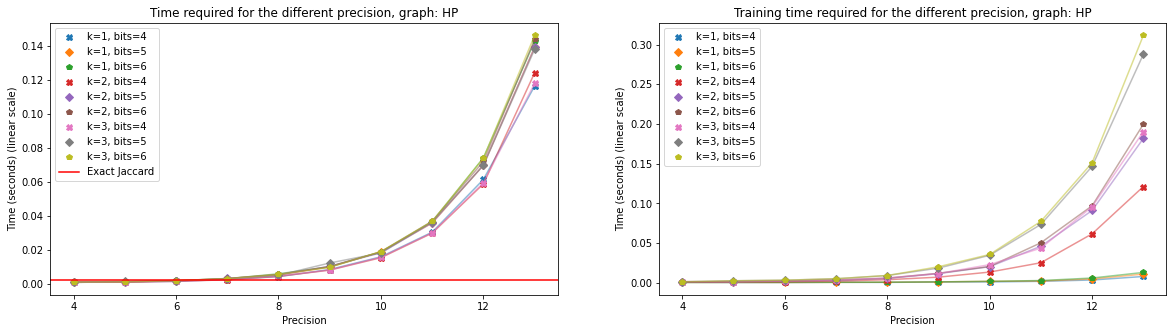

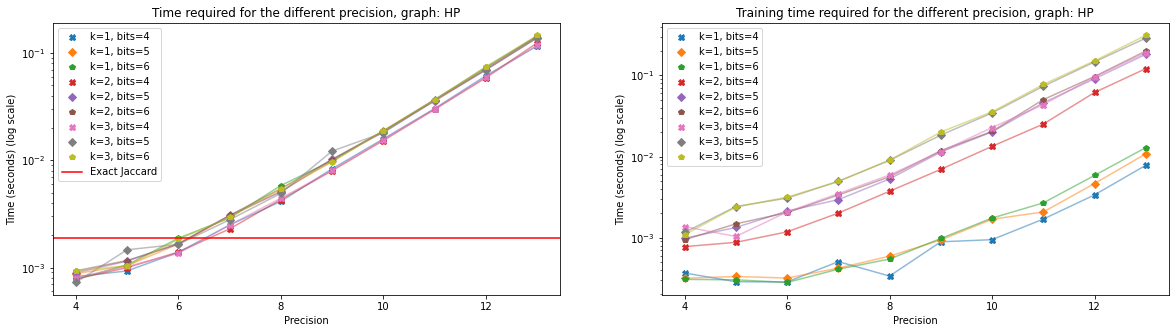

The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1.

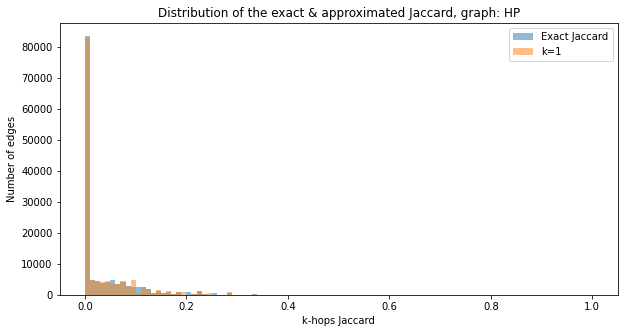

The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1, k=2 and k=3, k=4, and k=5.

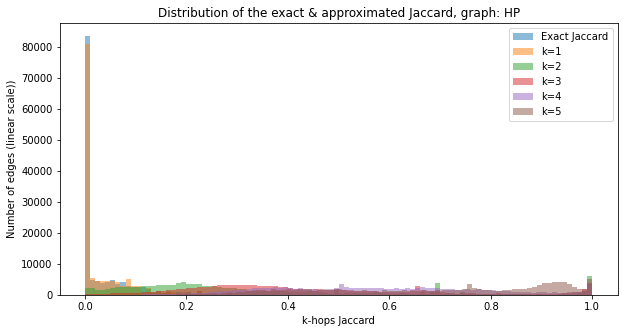

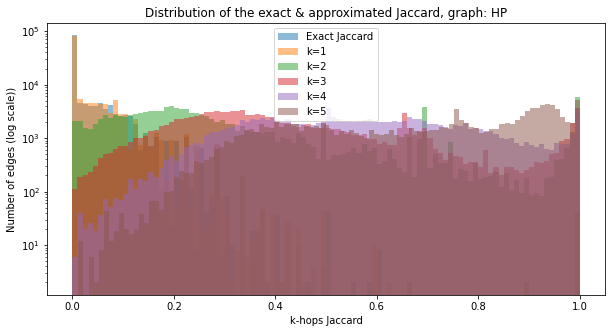

The following figure shows the distribution of the degree for k=1, k=2, k=3, k=4 and k=5.

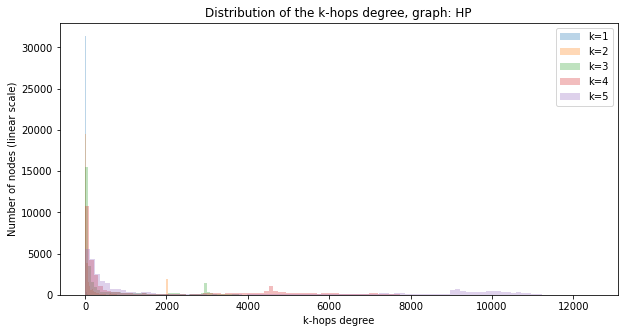

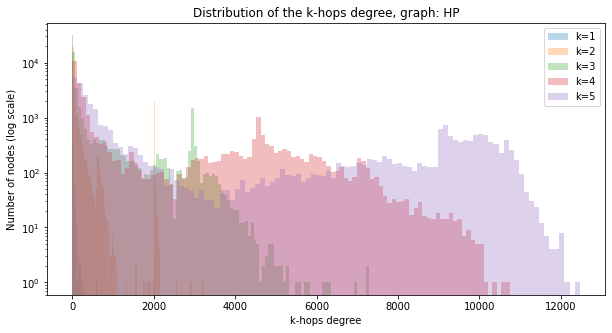

In [4]:
experiment(HP())

While the older, less numerically stable version of the algorithm was not able to provide accurate estimates for the HPO graph, the new version is able to provide accurate estimates even at small resolutions. Nevertheless, we observe that the approximated algorithm for $k=1$ results slower than the exact version of graphs containing exclusively very low-degree nodes.

Let's bump it up a notch, and we move to STRING Homo Sapiens:

## Experiments on HomoSapiens

We use the HomoSapiens graph with 19566 nodes and 11938498 edges.

### Approximated Jaccard for k=1

We estimate the error between the exact Jaccard and the approximated Jaccard for k=1 for different values of precision and bits.

Time required for computing the exact Jaccard: 2.183805 seconds.

  0%|          | 0/10 [00:00<?, ?it/s]

The following table shows the mean absolute error (MAE) and the mean squared error (MSE) for the different memory requirement defined by $\text{bits}^{\text{precision}}$.

,precision,bits,k,error_mse,error_mae,training_time,time
0,4,4,1,0.025967,0.122341,0.006891,0.033618
3,5,4,1,0.015067,0.094572,0.006833,0.055906
6,6,4,1,0.006248,0.061428,0.007256,0.096608
9,7,4,1,0.003632,0.047056,0.007782,0.180849
12,8,4,1,0.002263,0.037042,0.008772,0.343938
15,9,4,1,0.001177,0.026744,0.008233,0.670066
18,10,4,1,0.000584,0.018618,0.008519,1.322930
21,11,4,1,0.000166,0.010105,0.007483,2.609796
24,12,4,1,0.000064,0.006311,0.007511,5.289232
27,13,4,1,0.000028,0.004172,0.009127,10.312617


,precision,bits,k,error_mse,error_mae,training_time,time
1,4,5,1,0.615021,0.779455,0.007577,0.042805
4,5,5,1,0.503848,0.703483,0.007459,0.068561
7,6,5,1,0.105973,0.307364,0.008047,0.117200
10,7,5,1,0.047227,0.202626,0.008297,0.214165
13,8,5,1,0.004684,0.055925,0.008765,0.407272
16,9,5,1,0.002311,0.037859,0.008727,0.836259
19,10,5,1,0.000541,0.018051,0.008623,1.574617
22,11,5,1,0.000165,0.010092,0.008019,3.116995
25,12,5,1,0.000064,0.006311,0.008952,6.159706
28,13,5,1,0.000028,0.004163,0.010394,12.354325


,precision,bits,k,error_mse,error_mae,training_time,time
2,4,6,1,0.700377,0.833789,0.007661,0.046922
5,5,6,1,0.444698,0.658386,0.007633,0.069751
8,6,6,1,0.046947,0.196193,0.008160,0.115794
11,7,6,1,0.019091,0.122503,0.008357,0.218016
14,8,6,1,0.009449,0.084410,0.008878,0.427445
17,9,6,1,0.001894,0.034052,0.009081,0.812913
20,10,6,1,0.000561,0.018323,0.008462,1.604767
23,11,6,1,0.000165,0.010097,0.008684,3.162751
26,12,6,1,0.000064,0.006311,0.009097,6.310373
29,13,6,1,0.000028,0.004163,0.011084,12.525730


The following figure shows the mean absolute error (MAE) (left) and the mean squared error (MSE) (right) for the different memory requirement defined by $\text{bits}^{\text{precision}}$.

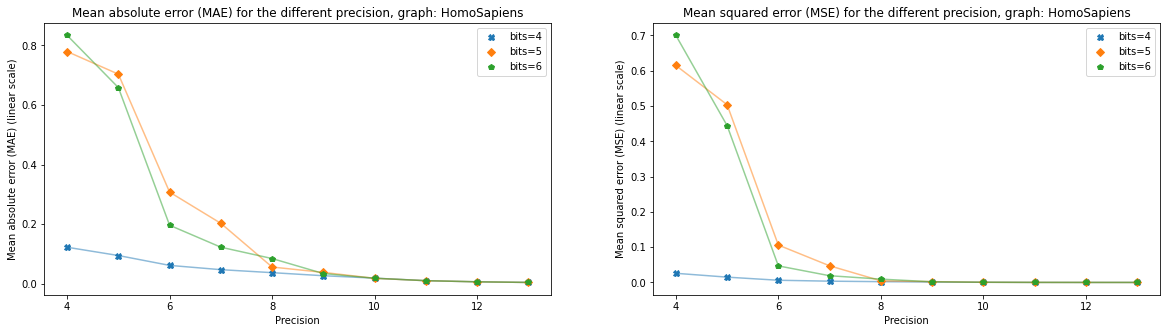

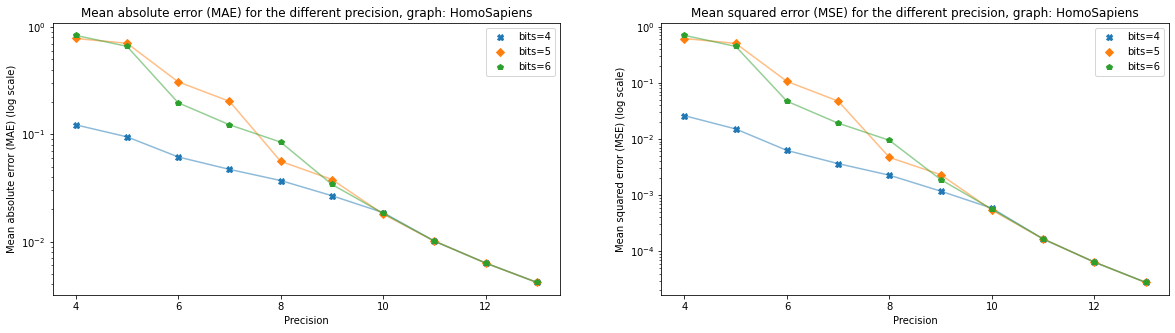

The following figure shows the time required for the different memory requirement defined by $\text{bits}^{\text{precision}}$.

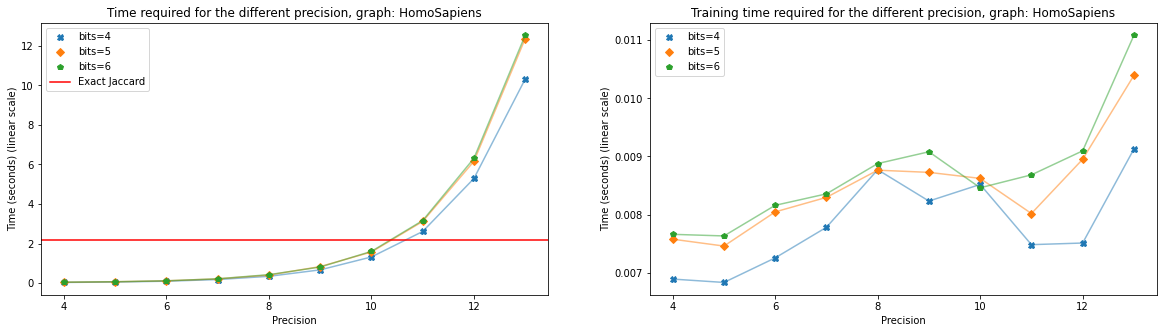

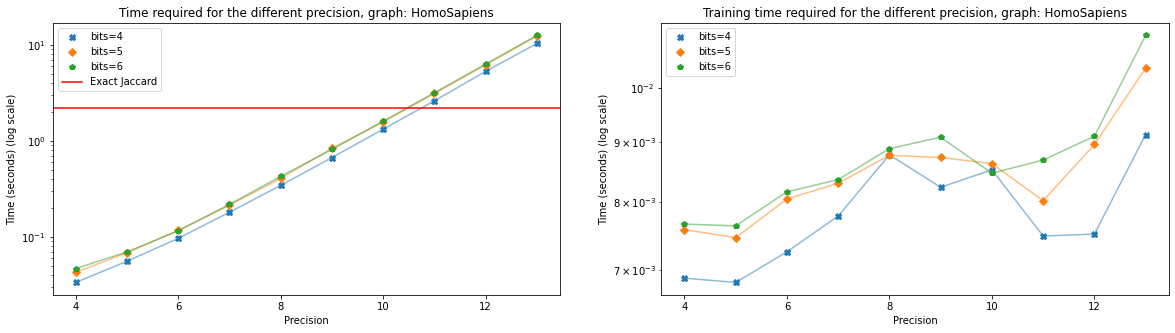

### Approximated Jaccard for k=2 and k=3

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

The following figure shows the time required for the different memory requirement defined by $\text{bits}^{\text{precision}}$.

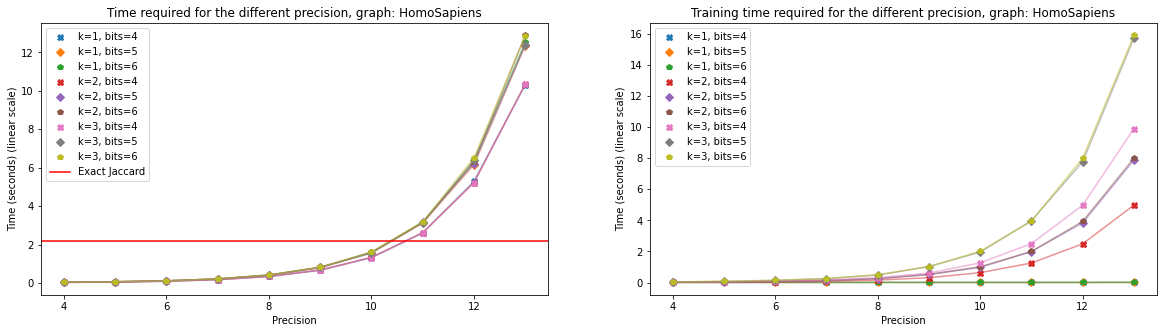

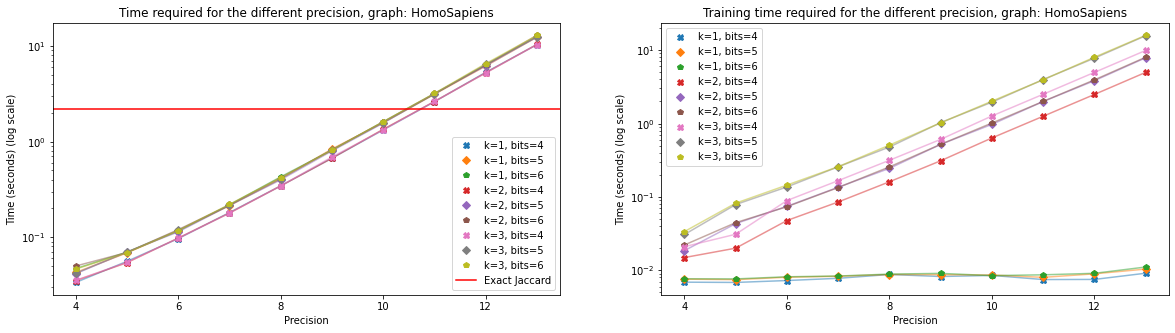

The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1.

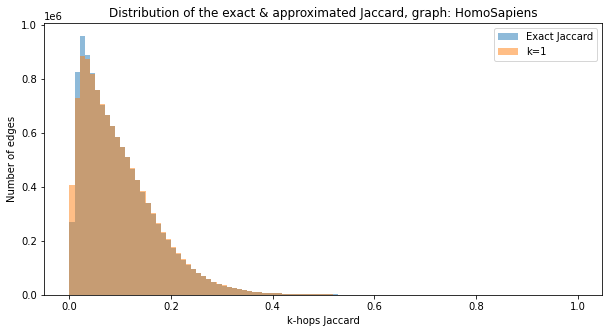

The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1, k=2 and k=3, k=4, and k=5.

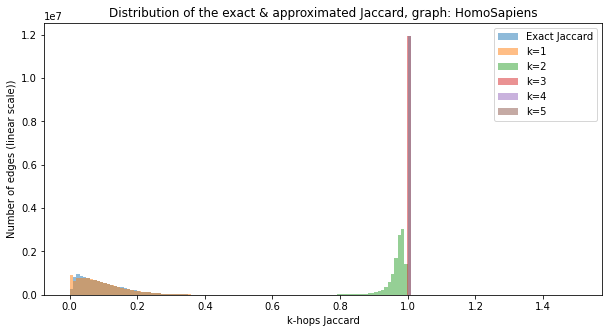

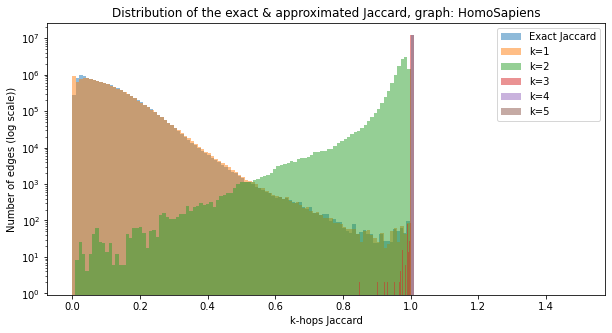

The following figure shows the distribution of the degree for k=1, k=2, k=3, k=4 and k=5.

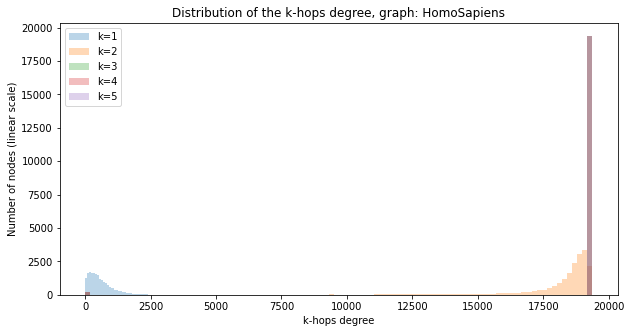

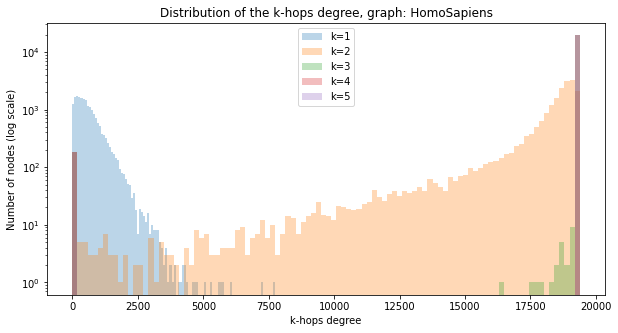

In [5]:
experiment(HomoSapiens())

## Experiments on KGCOVID19

We use the KGCOVID19 graph with 574778 nodes and 36509132 edges.

### Approximated Jaccard for k=1

We estimate the error between the exact Jaccard and the approximated Jaccard for k=1 for different values of precision and bits.

Time required for computing the exact Jaccard: 5.522042 seconds.

  0%|          | 0/10 [00:00<?, ?it/s]

The following table shows the mean absolute error (MAE) and the mean squared error (MSE) for the different memory requirement defined by $\text{bits}^{\text{precision}}$.

,precision,bits,k,error_mse,error_mae,training_time,time
0,4,4,1,0.010827,0.060248,0.027478,0.118731
3,5,4,1,0.006038,0.044942,0.026974,0.184356
6,6,4,1,0.002697,0.029495,0.027566,0.314478
9,7,4,1,0.001502,0.021975,0.036969,0.568627
12,8,4,1,0.000822,0.016108,0.032052,1.096675
15,9,4,1,0.000451,0.011892,0.033668,2.107754
18,10,4,1,0.000218,0.008220,0.033970,4.127217
21,11,4,1,0.000072,0.004776,0.048740,8.047614
24,12,4,1,0.000028,0.003019,0.078238,15.961155
27,13,4,1,0.000013,0.002057,0.153412,31.591525


,precision,bits,k,error_mse,error_mae,training_time,time
1,4,5,1,0.413959,0.605922,0.028887,0.147646
4,5,5,1,0.327431,0.525056,0.029970,0.225411
7,6,5,1,0.049426,0.170813,0.031091,0.369441
10,7,5,1,0.021306,0.107409,0.032712,0.691245
13,8,5,1,0.001723,0.025666,0.040814,1.303886
16,9,5,1,0.000868,0.017308,0.045182,2.538479
19,10,5,1,0.000212,0.008269,0.049258,5.140493
22,11,5,1,0.000072,0.004821,0.063665,9.674159
25,12,5,1,0.000028,0.003023,0.104408,19.018804
28,13,5,1,0.000013,0.002058,0.201637,37.846356


,precision,bits,k,error_mse,error_mae,training_time,time
2,4,6,1,0.593264,0.743999,0.029761,0.151311
5,5,6,1,0.258688,0.457102,0.035370,0.235269
8,6,6,1,0.021601,0.105741,0.030859,0.375389
11,7,6,1,0.008455,0.063453,0.033691,0.701821
14,8,6,1,0.003590,0.039434,0.034866,1.323618
17,9,6,1,0.000716,0.015557,0.037834,2.570564
20,10,6,1,0.000214,0.008231,0.040794,4.998111
23,11,6,1,0.000072,0.004795,0.063592,9.827861
26,12,6,1,0.000028,0.003028,0.123868,19.377508
29,13,6,1,0.000013,0.002058,0.240478,38.389649


The following figure shows the mean absolute error (MAE) (left) and the mean squared error (MSE) (right) for the different memory requirement defined by $\text{bits}^{\text{precision}}$.

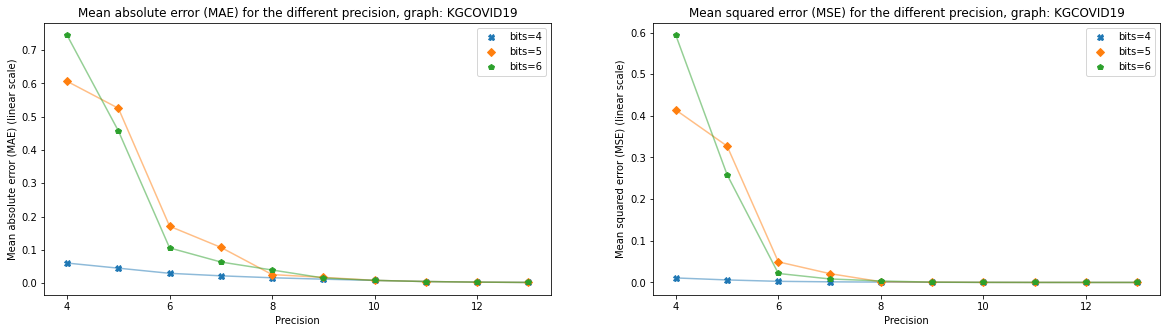

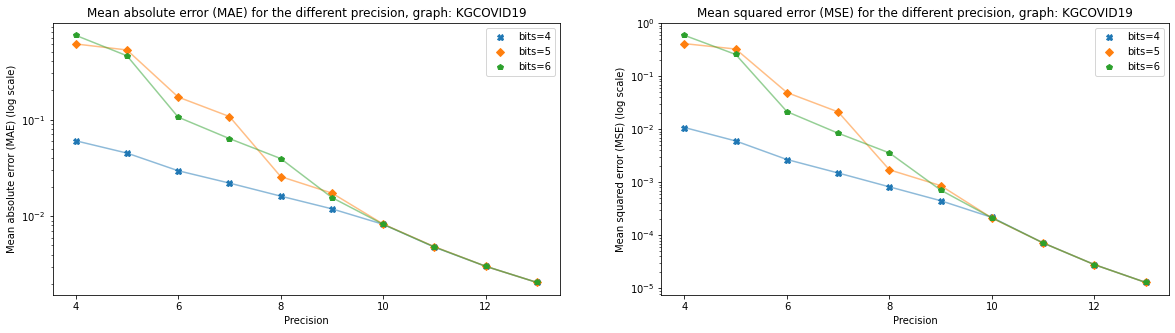

The following figure shows the time required for the different memory requirement defined by $\text{bits}^{\text{precision}}$.

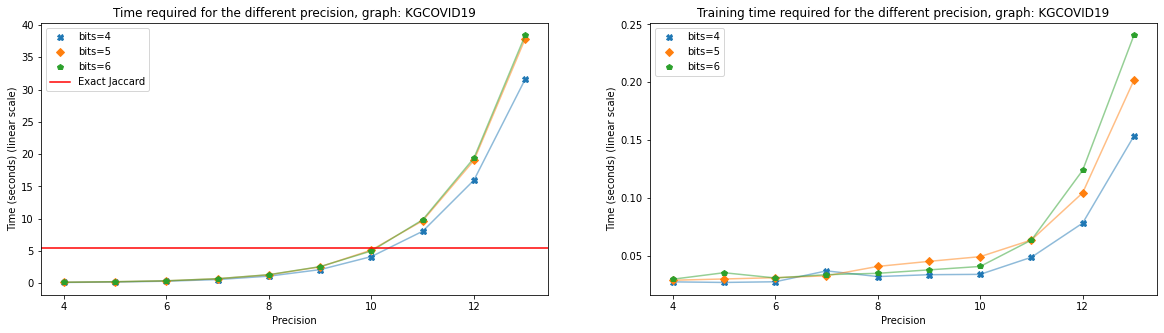

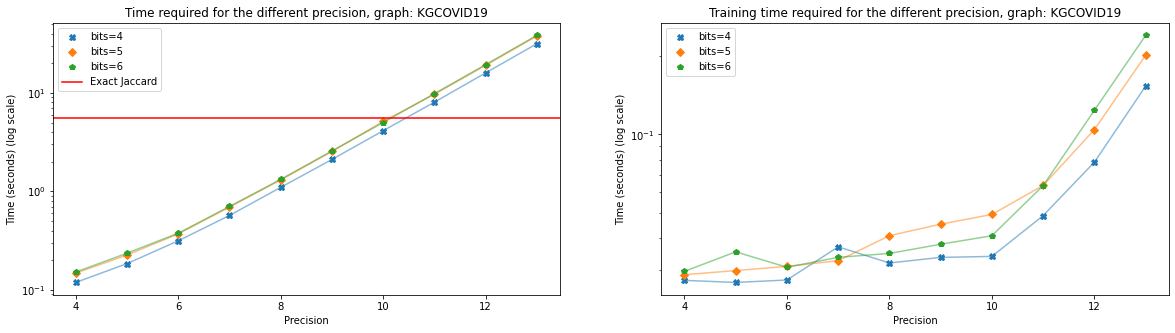

### Approximated Jaccard for k=2 and k=3

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

The following figure shows the time required for the different memory requirement defined by $\text{bits}^{\text{precision}}$.

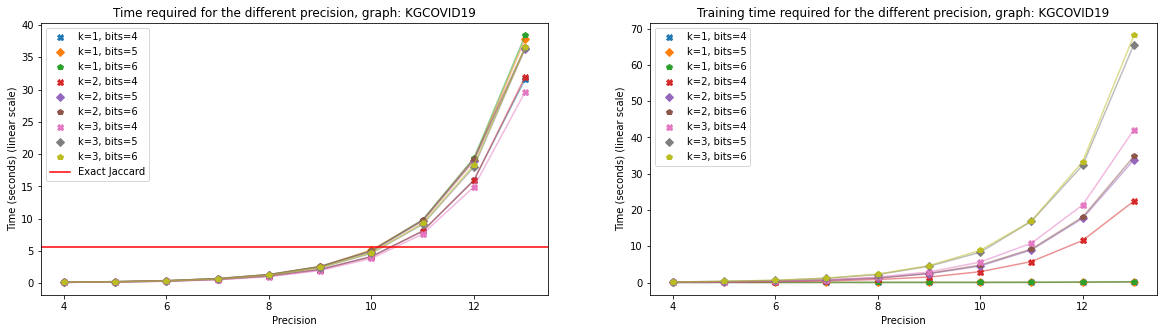

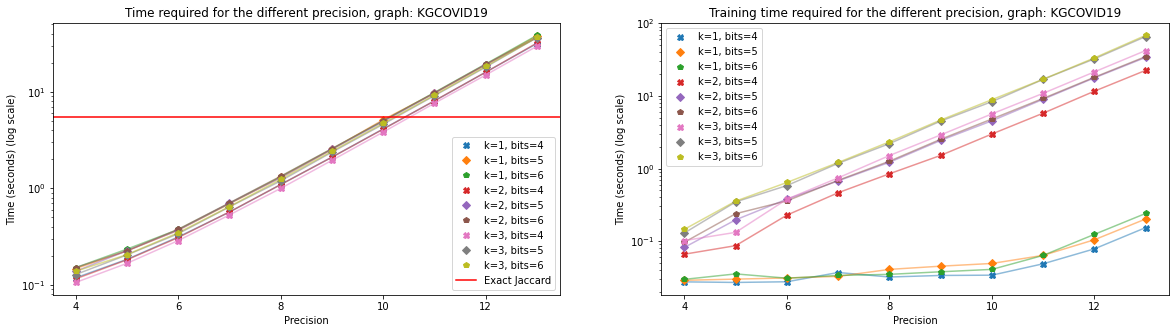

The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1.

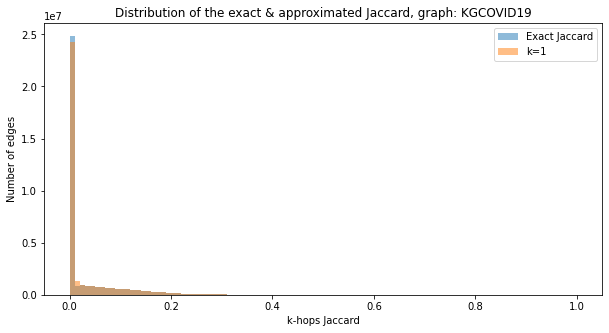

The following figure shows the distribution of the exact Jaccard (k=1) and approximated Jaccard for k=1, k=2 and k=3, k=4, and k=5.

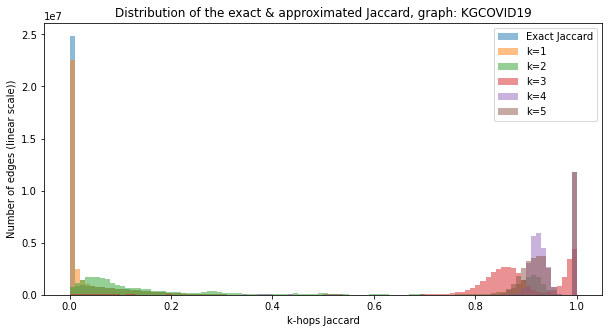

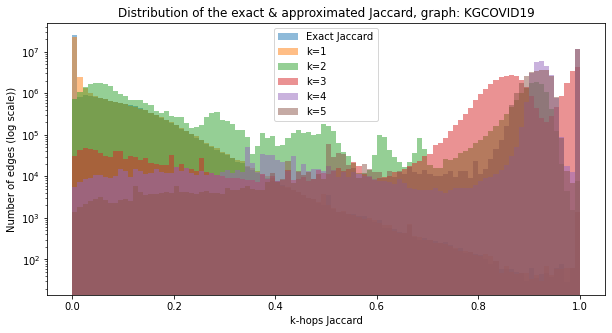

The following figure shows the distribution of the degree for k=1, k=2, k=3, k=4 and k=5.

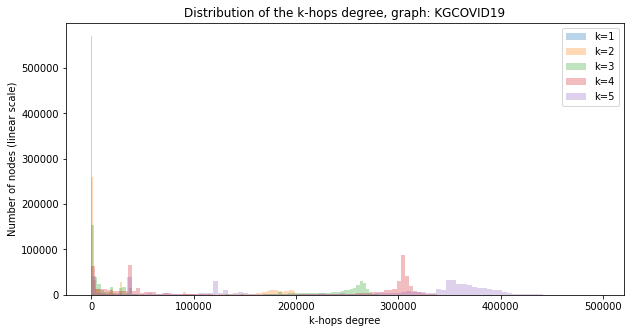

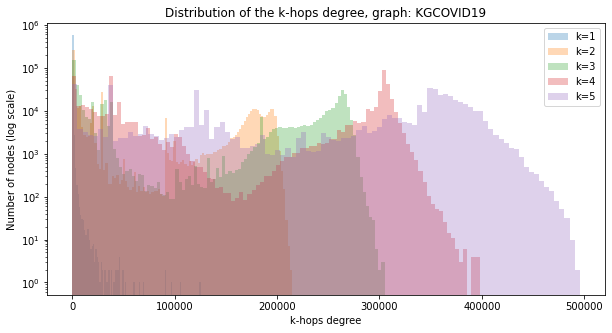

In [6]:
experiment(KGCOVID19())

## Conclusive notes
In conclusion, this Jupyter Notebook tutorial has provided a comprehensive exploration of approximated k-hops Jaccard using the GRAPE library. We began by understanding the concept of Jaccard similarity and how it can be extended to k-hops Jaccard, enabling us to capture the similarity between neighboring nodes at different distances.

We delved into the challenges of computing exact k-hops Jaccard, highlighting its computational complexity and infeasibility for large graphs with high-degree nodes. This motivated the need for an efficient approximation method, leading us to HyperLogLog counters—a powerful probabilistic data structure for cardinality estimation.

The tutorial then guided us through the implementation of the efficient k-hops Jaccard estimator using HyperLogLog counters, leveraging the GRAPE library's Rust implementation with Python bindings. We learned how the improved algorithm achieves constant-time estimation while maintaining high accuracy.

Through practical experiments on three diverse graphs—Human Phenotype Ontology, Homo Sapiens STRING PPI, and KGCOVID19—we observed the effectiveness of the approximated k-hops Jaccard estimator. We explored the accuracy of the estimator for k=1, showcasing its remarkable performance compared to exact Jaccard computation. Additionally, we examined histograms for k=2, k=3, k=4 and k=5 demonstrating the utility of the estimator for capturing similarity in multi-hop neighborhoods.

Furthermore, we revealed exciting insights from experimenting with different precision values and register bit configurations. Counterintuitively, we discovered that small registers of 4 bits offer excellent accuracy, enabling efficient memory utilization by packing 8 registers in a single u32 word. This breakthrough, made possible by improved numerical stability, enhances both performance and resource optimization.

Finally, we introduced support for k-hop degree analysis, empowering users to explore the degree distribution alongside the k-hops Jaccard similarity. This added dimension of analysis unlocks deeper insights into the graph structure and fosters a richer understanding of connectivity patterns.

[You can learn more about HyperLogLog here](https://github.com/LucaCappelletti94/hyperloglog-rs).

Don't forget to ⭐ GRAPE!